# Data loading and basic EDA

In [ ]:
#read data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


AttributeError: 'DataFrame' object has no attribute 'rows'

In [26]:
len(df_train)

595212

In [13]:
#display first few rows of the dataframe
print(df_train.head())

#descriptive statistics
print(df_train.describe())

#check for missing values
print(df_train.isnull().sum())

   id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4              0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1 

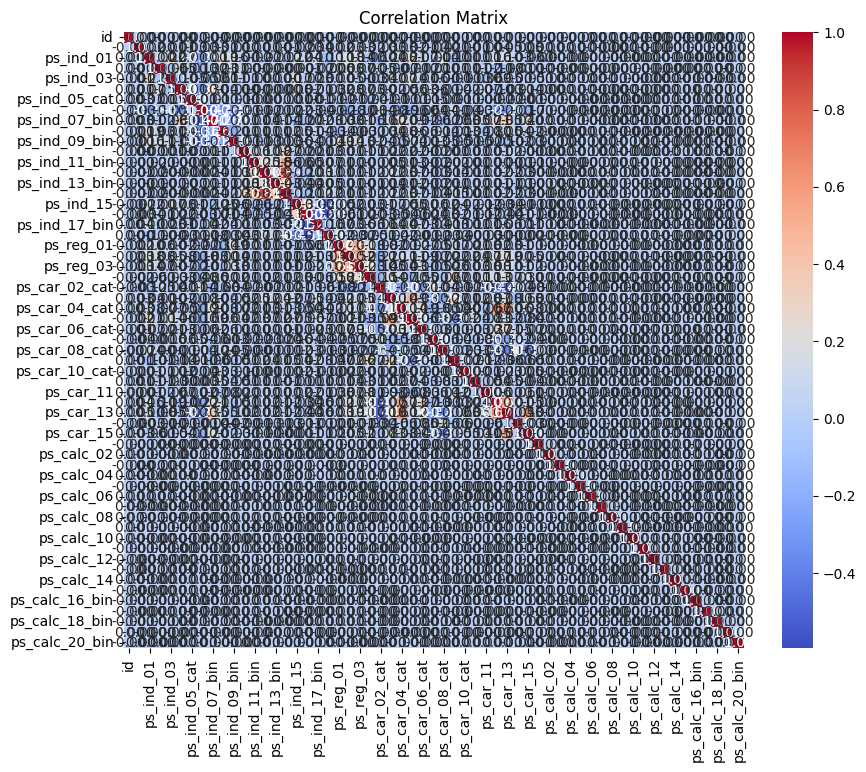

In [14]:
#corelation matrix
corr_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split data into features and target

In [12]:
#split data into features and target variable

y = df_train["target"]
X = df_train.drop(columns=["target", "id"])


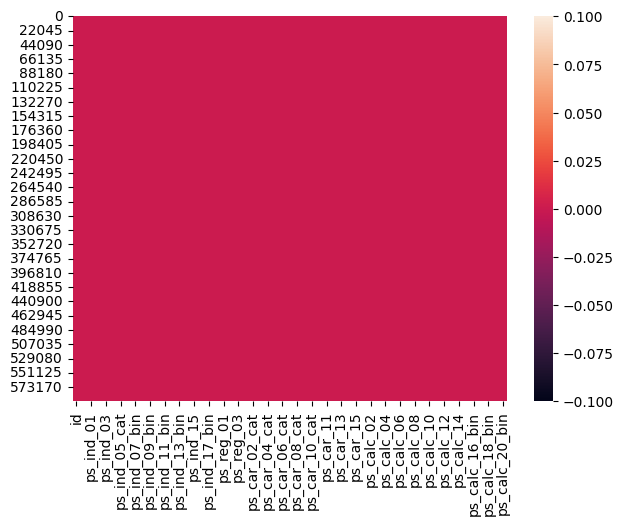

In [16]:
# check missing values graphically
plt.figure(figsize=(7,5), dpi=100)
sns.heatmap(df_train.isna());

                 count        pct
ps_car_03_cat   411231  69.089837
ps_car_05_cat   266551  44.782531
ps_reg_03       107772  18.106490
ps_car_14        42620   7.160474
ps_car_07_cat    11489   1.930237
ps_ind_05_cat     5809   0.975955
ps_car_09_cat      569   0.095596
ps_ind_02_cat      216   0.036290
ps_car_01_cat      107   0.017977
ps_ind_04_cat       83   0.013945
ps_car_11            5   0.000840
ps_car_02_cat        5   0.000840
ps_car_12            1   0.000168
ps_calc_11           0   0.000000
ps_calc_15_bin       0   0.000000
ps_car_13            0   0.000000
ps_calc_19_bin       0   0.000000
ps_calc_18_bin       0   0.000000
ps_car_15            0   0.000000
ps_calc_01           0   0.000000
ps_calc_17_bin       0   0.000000
ps_calc_02           0   0.000000
ps_calc_16_bin       0   0.000000
ps_calc_14           0   0.000000
ps_calc_10           0   0.000000
ps_calc_13           0   0.000000
ps_calc_03           0   0.000000
ps_calc_04           0   0.000000
ps_calc_05    

/var/folders/md/y45ymr6j7jd35srmrt_d3l480000gn/T/ipykernel_57620/2392497045.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top['count'].values, y=top.index, palette='viridis')


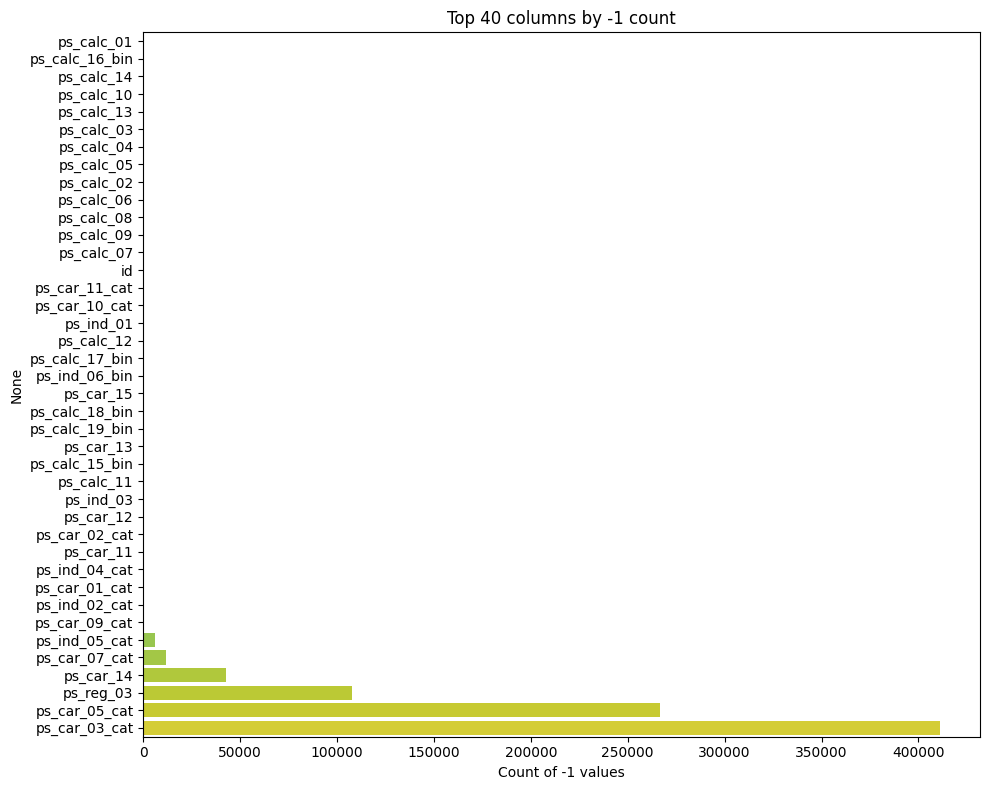

/var/folders/md/y45ymr6j7jd35srmrt_d3l480000gn/T/ipykernel_57620/2392497045.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top['pct'].values, y=top.index, palette='magma')


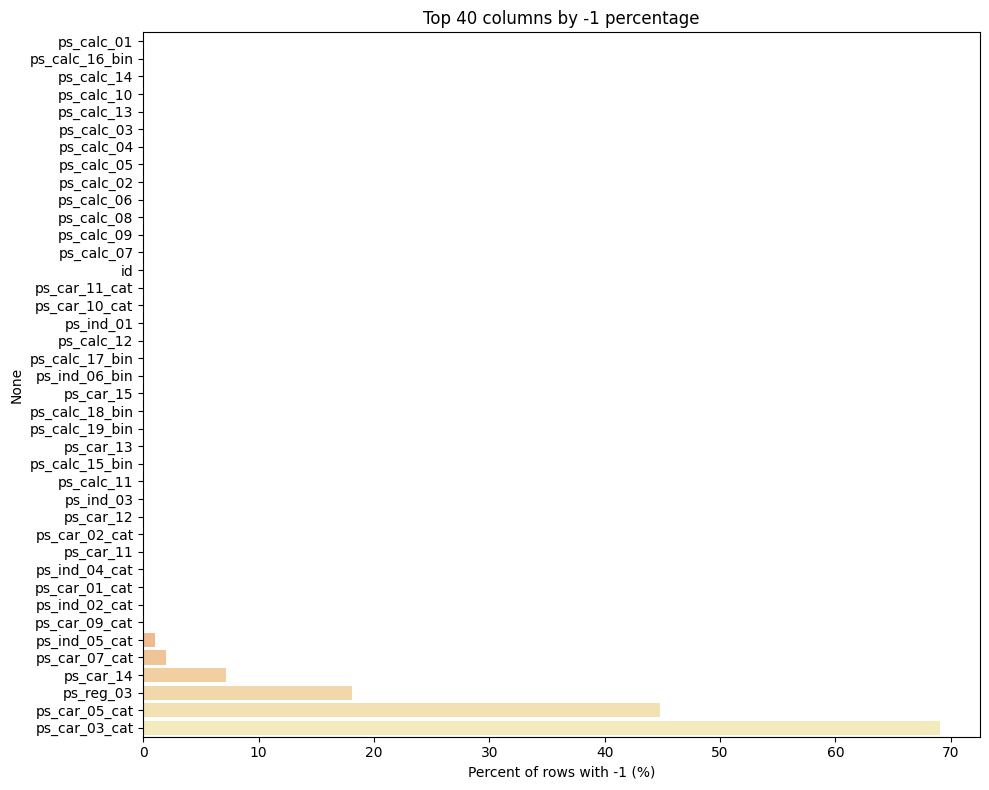

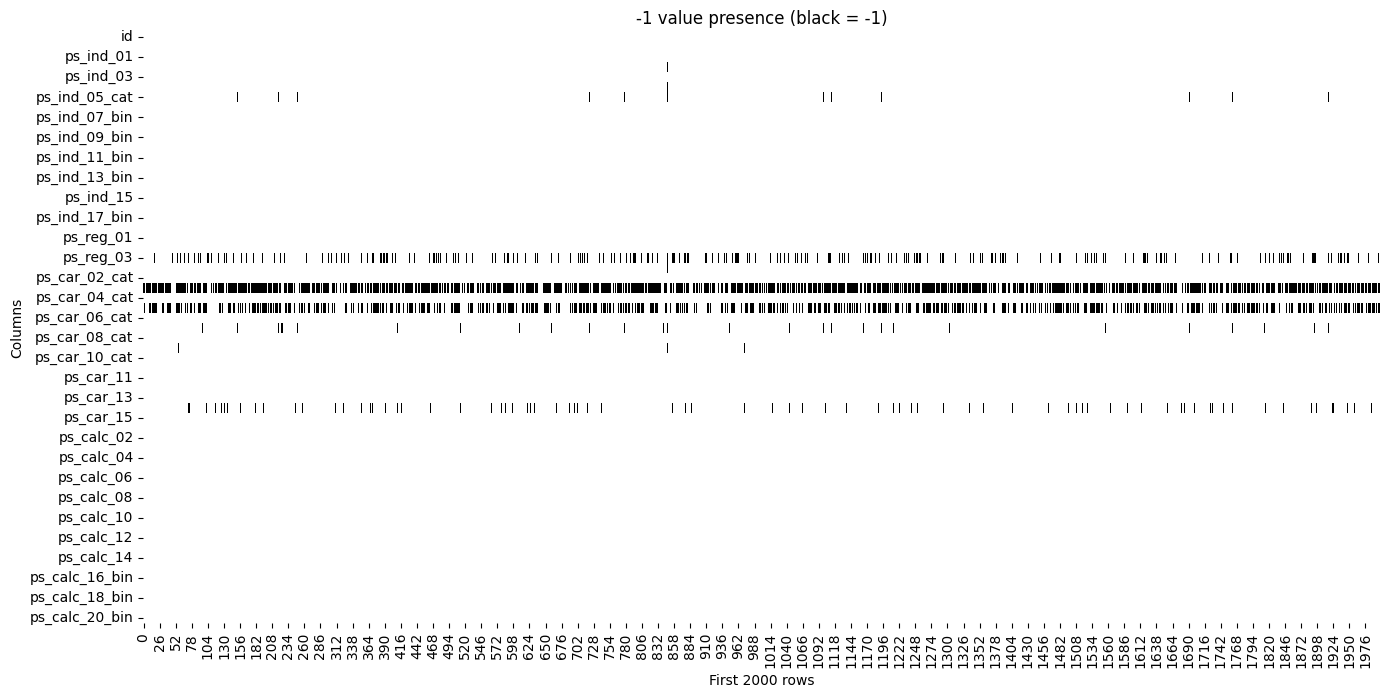

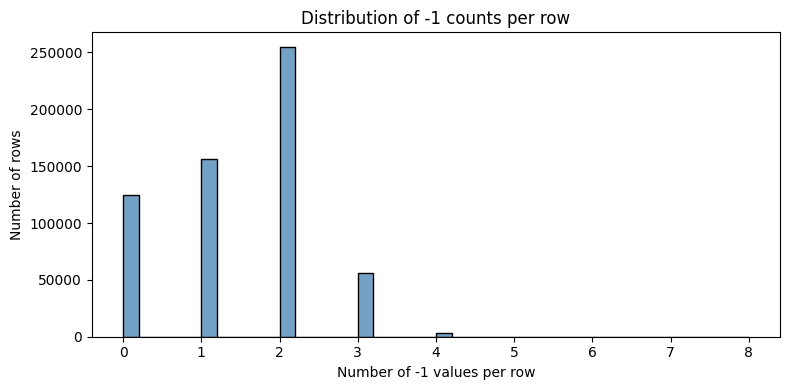

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load train if not already present
if 'train' not in globals():
    train = pd.read_csv('train.csv')

# boolean mask of -1 values
mask = (train == -1)

# per-column counts and percent
col_counts = mask.sum()
col_pct = col_counts / len(train) * 100
summary = pd.DataFrame({'count': col_counts, 'pct': col_pct}).sort_values('count', ascending=False)

# print and save summary
print(summary.head(50).to_string())
summary.to_csv('minus1_counts.csv')

# bar plot: top columns by -1 count
topN = 40
top = summary.head(topN).sort_values('count')
plt.figure(figsize=(10, max(4, len(top)*0.2)))
sns.barplot(x=top['count'].values, y=top.index, palette='viridis')
plt.xlabel('Count of -1 values')
plt.title(f'Top {topN} columns by -1 count')
plt.tight_layout()
plt.show()

# bar plot: percent
plt.figure(figsize=(10, max(4, len(top)*0.2)))
sns.barplot(x=top['pct'].values, y=top.index, palette='magma')
plt.xlabel('Percent of rows with -1 (%)')
plt.title(f'Top {topN} columns by -1 percentage')
plt.tight_layout()
plt.show()

# heatmap of -1 occurrences (sample first rows for readability)
nrows = min(2000, len(train))
sample = mask.iloc[:nrows].T.astype(int)  # columns x rows
plt.figure(figsize=(14, max(6, len(sample.index)*0.12)))
sns.heatmap(sample, cbar=False, cmap='Greys', linewidths=0)
plt.xlabel(f'First {nrows} rows')
plt.ylabel('Columns')
plt.title('-1 value presence (black = -1)')
plt.tight_layout()
plt.show()

# distribution of -1 counts per row
row_counts = mask.sum(axis=1)
plt.figure(figsize=(8,4))
sns.histplot(row_counts, bins=40, color='steelblue')
plt.xlabel('Number of -1 values per row')
plt.ylabel('Number of rows')
plt.title('Distribution of -1 counts per row')
plt.tight_layout()
plt.show()

# Dealing with missing values and feature preprocessing

The dataset encodes missing values as -1. For the logistic regression baseline, missing values were handled in a type-aware manner to avoid introducing artificial numeric meaning.
- Binary features (*_bin) treat missing values as absence (-1 → 0) and are kept as numeric flags.
- Continuous features replace missing values with the median, include an explicit missing indicator to preserve potential signal from missingness, and are standardized to improve numerical stability in the linear model.
- Categorical features (*_cat) treat -1 as a separate “unknown” category and are fully one-hot encoded to remove artificial ordinal assumptions.

This preprocessing yields a clean and interpretable baseline, providing a fair reference point for comparison with more expressive tree-based models.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

# target and features
y = train["target"]
X = train.drop(columns=["target", "id"])

# feature groups
bin_cols = [c for c in X.columns if c.endswith("_bin")]
cat_cols = [c for c in X.columns if c.endswith("_cat")]
num_cols = [c for c in X.columns if c not in bin_cols + cat_cols]

# pipelines
bin_pipe = Pipeline([
    ("imputer", SimpleImputer(missing_values=-1, strategy="constant", fill_value=0))
])

num_pipe = Pipeline([
    ("imputer", SimpleImputer(missing_values=-1, strategy="median", add_indicator=True)),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(missing_values=-1, strategy="constant", fill_value=-1)),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# column transformer
preprocess = ColumnTransformer([
    ("bin", bin_pipe, bin_cols),
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
])



# Baseline Logisitc regression model with all features

In [19]:
# full baseline model
baseline_model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000, n_jobs=-1))
])

# always evaluate on a holdout split (not training data)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_pred)

# Normalized Gini for this competition = 2*AUC - 1
gini_normalized = 2 * auc - 1
print(f"AUC: {auc:.4f}")
print(f"Normalized Gini: {gini_normalized:.4f}")


AUC: 0.6319
Normalized Gini: 0.2638


# Using GridSearchCV to find the best hyperparams for the baseline logistic regression model

In [20]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# target and features
y = df_train["target"]
X = df_train.drop(columns=["target", "id"])
# full baseline model
baseline_model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=3000, n_jobs=-1))
])

# holdout split for final reporting (do NOT tune on this)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = [
    {
        "clf__solver": ["lbfgs"],
        "clf__penalty": ["l2"],
        "clf__C": [0.01, 0.1, 1.0, 10.0],
        "clf__class_weight": [None, "balanced"],
    },
    {
        "clf__solver": ["saga"],
        "clf__penalty": ["l1", "l2"],
        "clf__C": [0.01, 0.1, 1.0, 10.0],
        "clf__class_weight": [None, "balanced"],
    },
]

grid = GridSearchCV(
    estimator=baseline_model,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

grid.fit(X_train, y_train)

print("Best CV AUC:", grid.best_score_)
print("Best params:", grid.best_params_)

# evaluate best model on holdout
best_model = grid.best_estimator_
y_pred = best_model.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_pred)
gini = 2 * auc - 1

print(f"Holdout AUC: {auc:.4f}")
print(f"Holdout Normalized Gini: {gini:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/sorinmanole/aipmbootcamp/ds-safe-driver-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 

# Inspect top 10 logistic regression weights

In [6]:
# ----------------------------------------
# Inspect top 10 logistic regression weights
# ----------------------------------------

import pandas as pd
import numpy as np

# get best trained pipeline from GridSearchCV
best_model = grid.best_estimator_

# extract preprocessing and classifier
prep = best_model.named_steps["prep"]
clf = best_model.named_steps["clf"]

# get feature names after preprocessing
feature_names = prep.get_feature_names_out()

# get coefficients (binary classification -> shape (n_features,))
coefs = clf.coef_[0]

# build dataframe
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs,
    "abs_coefficient": np.abs(coefs)
})

# sort by absolute coefficient magnitude
top10 = (
    coef_df
    .sort_values("abs_coefficient", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# optional: clean feature names for readability
top10["feature"] = (
    top10["feature"]
    .str.replace("bin__", "", regex=False)
    .str.replace("num__", "", regex=False)
    .str.replace("cat__", "", regex=False)
)

print("Top 10 features by absolute logistic regression weight:")
top10

AttributeError: 'dict' object has no attribute 'best_estimator_'

The GridSearchCV take 44 minutes to find the best hyperparams:

- Best params: {'clf__C': 0.01, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
- Best AUC: 0.6208
- Best Normalized Gini: 0.2415

# Experiment: Logistic regression using top-10 correlated features only


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# --- 1) Define the top-10 features ---
top10_features = [
    "ps_car_13",
    "ps_car_11_cat",
    "ps_car_12",
    "ps_car_04_cat",
    "ps_ind_17_bin",
    "ps_car_06_cat",
    "ps_ind_05_cat",
    "ps_car_01_cat",
    "ps_reg_02",
    "ps_reg_03",
]

# --- 2) Build X/y using only those features ---
y = train["target"]
X = train[top10_features].copy()

# --- 3) Split columns by type ---
bin_cols = [c for c in X.columns if c.endswith("_bin")]
cat_cols = [c for c in X.columns if c.endswith("_cat")]
num_cols = [c for c in X.columns if c not in bin_cols + cat_cols]

# --- 4) Preprocessing pipelines (same logic as the baseline) ---
bin_pipe = Pipeline([
    ("imputer", SimpleImputer(missing_values=-1, strategy="constant", fill_value=0))
])

num_pipe = Pipeline([
    ("imputer", SimpleImputer(missing_values=-1, strategy="median", add_indicator=True)),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(missing_values=-1, strategy="constant", fill_value=-1)),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("bin", bin_pipe, bin_cols),
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
])

# --- 5) Model ---
top10_model = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000, n_jobs=-1))
])

# --- 6) Train/validate and compute Normalized Gini ---
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

top10_model.fit(X_train, y_train)

y_pred = top10_model.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_pred)
gini_normalized = 2 * auc - 1

print(f"Top-10 features only - AUC: {auc:.4f}")
print(f"Top-10 features only - Normalized Gini: {gini_normalized:.4f}")

/Users/sorinmanole/aipmbootcamp/ds-safe-driver-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


Top-10 features only - AUC: 0.6189
Top-10 features only - Normalized Gini: 0.2378


# Train a CatBoost model 

In [8]:
#Train a CatBoost model using all features
from catboost import CatBoostClassifier 
from sklearn.model_selection import train_test_split    
from sklearn.metrics import roc_auc_score

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

cat_features = [X.columns.get_loc(c) for c in X.columns if c.endswith("_cat")]
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    auto_class_weights="Balanced",
    random_seed=42,
    logging_level='Silent'
)
cat_model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_valid, y_valid), use_best_model=True)    
y_pred_cat = cat_model.predict_proba(X_valid)[:, 1]
auc_cat = roc_auc_score(y_valid, y_pred_cat)
gini_cat = 2 * auc_cat - 1
print(f"CatBoost Model - AUC: {auc_cat:.4f}")
print(f"CatBoost Model - Normalized Gini: {gini_cat:.4f}")


CatBoost Model - AUC: 0.6416
CatBoost Model - Normalized Gini: 0.2831


# Inspect top 10 features for the CatBoost model

In [9]:
# ----------------------------------------
# Top 10 CatBoost feature importances
# ----------------------------------------

import pandas as pd
import numpy as np

# get importance scores (default: PredictionValuesChange / gain-based)
importances = cat_model.get_feature_importance()

feature_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
})

top10 = (
    feature_importance_df
    .sort_values("importance", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print("Top 10 CatBoost features by importance:")
top10

Top 10 CatBoost features by importance:


,feature,importance
0,ps_car_13,10.314739
1,ps_ind_03,8.137345
2,ps_ind_15,5.845550
3,ps_reg_03,5.683599
4,ps_reg_01,5.074276
5,ps_ind_05_cat,4.749584
6,ps_car_15,4.000513
7,ps_ind_01,3.569484
8,ps_reg_02,3.419770
9,ps_ind_02_cat,3.323204


# Train a XGBoost model

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = xgb.XGBClassifier(
    n_estimators=2000,
    learning_rate=0.02,
    max_depth=5,
    eval_metric="auc",
    early_stopping_rounds=200,   # <-- MOVE HERE
    scale_pos_weight=pos_weight,
    random_state=42,
    n_jobs=-1,
    min_child_weight=2,
    reg_alpha=0.1,
    subsample=0.8,
    colsample_bytree=0.7,
    gamma=0.0,
    reg_lambda=5.0,
    tree_method="hist")

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

y_pred_xgb = xgb_model.predict_proba(X_valid)[:, 1]
auc_xgb = roc_auc_score(y_valid, y_pred_xgb)
gini_xgb = 2 * auc_xgb - 1

print(f"XGBoost Model - AUC: {auc_xgb:.4f}")
print(f"XGBoost Model - Normalized Gini: {gini_xgb:.4f}")

XGBoost Model - AUC: 0.6403
XGBoost Model - Normalized Gini: 0.2806


# Get top 10 most important features for XGBoost

In [19]:
import pandas as pd
import numpy as np

# get feature importances (gain-based)
importances = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
})

top10 = (
    feature_importance_df
    .sort_values("importance", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print("Top 10 XGBoost features by importance:")
top10

Top 10 XGBoost features by importance:


,feature,importance
0,ps_ind_17_bin,0.066030
1,ps_ind_06_bin,0.065973
2,ps_car_07_cat,0.049831
3,ps_ind_05_cat,0.042076
4,ps_car_13,0.035313
5,ps_car_03_cat,0.033621
6,ps_ind_16_bin,0.032525
7,ps_ind_07_bin,0.031160
8,ps_car_04_cat,0.023932
9,ps_reg_03,0.023188


# Use GridSearchCV to find the best hyperparams for CatBoost

In [4]:
#use gridsearchcv to tune catboost hyperparameters

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from tqdm.auto import tqdm
from joblib import parallel_backend
import numpy as np

# ----------------------------
# Data
# ----------------------------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
cat_features = [X.columns.get_loc(c) for c in X.columns if c.endswith("_cat")]

# ----------------------------
# Model
# ----------------------------
base_cb = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    auto_class_weights="Balanced",
    random_seed=42,
    verbose=False
)

auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

param_grid = {
    "depth": [4, 6, 8],
    "learning_rate": [0.03, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5, 7],
    "iterations": [500, 1000],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=base_cb,
    param_grid=param_grid,
    scoring=auc_scorer,
    cv=cv,
    n_jobs=1,          # <-- IMPORTANT: avoid pickling/multiprocessing issues
    verbose=2,
    refit=True
)

grid.fit(X_train, y_train, cat_features=cat_features)

print("Best CV AUC:", grid.best_score_)
print("Best params:", grid.best_params_)

best_cb = grid.best_estimator_
y_pred = best_cb.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_pred)
gini = 2 * auc - 1

print(f"Holdout AUC: {auc:.4f}")
print(f"Holdout Normalized Gini: {gini:.4f}")

/Users/sorinmanole/aipmbootcamp/ds-safe-driver-prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 3 folds for each of 72 candidates, totalling 216 fits


KeyboardInterrupt: 

# Use CatBoos own CV to find the best hyperparams

In [ ]:
from itertools import product
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tqdm.auto import tqdm
import numpy as np
import os

# ----------------------------
# Data
# ----------------------------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

cat_features = [X.columns.get_loc(c) for c in X.columns if c.endswith("_cat")]
train_pool = Pool(X_train, y_train, cat_features=cat_features)

# ----------------------------
# Grid (same as yours)
# ----------------------------
grid = {
    "depth": [6, 8],
    "learning_rate": [0.05, 0.1],
    "l2_leaf_reg": [3, 7],
    "iterations": [400, 600],
}

# base params
THREADS = os.cpu_count() or 2
base_params = {
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "auto_class_weights": "Balanced",
    "random_seed": 42,
    "verbose": False,
    "thread_count": THREADS,     # parallelism INSIDE CatBoost
}

# ----------------------------
# Manual search with progress bar
# ----------------------------
keys = list(grid.keys())
combos = list(product(*[grid[k] for k in keys]))

best_auc = -1.0
best_params = None

for values in tqdm(combos, desc="CatBoost grid search"):
    params = base_params.copy()
    params.update(dict(zip(keys, values)))

    # CatBoost CV
    cv_results = cv(
        pool=train_pool,
        params=params,
        fold_count=2,
        shuffle=True,
        partition_random_seed=42,
        verbose=False,
    )

    auc_mean = float(cv_results["test-AUC-mean"].max())

    if auc_mean > best_auc:
        best_auc = auc_mean
        best_params = params

print("Best CV AUC:", best_auc)
print("Best CV Normalized Gini:", 2 * best_auc - 1)
print("Best params:", {k: best_params[k] for k in ["depth","learning_rate","l2_leaf_reg","iterations"]})

# ----------------------------
# Train best model and evaluate on holdout
# ----------------------------
best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train, cat_features=cat_features)

y_pred = best_model.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_pred)
gini = 2 * auc - 1

print(f"Holdout AUC: {auc:.4f}")
print(f"Holdout Normalized Gini: {gini:.4f}")

CatBoost grid search:   0%|          | 0/72 [00:00<?, ?it/s]

Training on fold [0/3]


CatBoost grid search:   0%|          | 0/72 [00:12<?, ?it/s]


KeyboardInterrupt: 

In [24]:

import numpy as np
from itertools import product
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import os

# Simple CatBoost search with NaNs handled natively and early stopping
X_full = df_train.drop(columns=["target", "id"]).replace(-1, np.nan)
y_full = df_train["target"]

# Identify categorical columns and convert them to strings (CatBoost requirement when NaNs exist)
cat_cols = [c for c in X_full.columns if c.endswith("_cat")]
X_full[cat_cols] = (
    X_full[cat_cols]
    .astype("Int64")    # keep integer codes, allow NA
    .astype(str)
    .fillna("nan")      # CatBoost cannot take float NaN in cat columns
)

cat_features = [X_full.columns.get_loc(c) for c in cat_cols]

# Holdout for reporting
X_train, X_valid, y_train, y_valid = train_test_split(
    X_full, y_full, test_size=0.2, stratify=y_full, random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=cat_features)
THREADS = os.cpu_count() or 2

param_space = {
    "depth": [6, 8],
    "learning_rate": [0.03, 0.05, 0.07],
    "l2_leaf_reg": [3, 5, 7],
    "bagging_temperature": [0, 2, 5],
    "subsample": [0.7, 0.85, 1.0],
    "rsm": [0.8, 0.9, 1.0],
}

# Randomly sample a small set of combos to keep runtime reasonable
all_combos = list(product(*param_space.values()))
rng = np.random.default_rng(42)
n_samples = min(12, len(all_combos))
sampled_idxs = rng.choice(len(all_combos), size=n_samples, replace=False)
sampled_combos = [all_combos[i] for i in sampled_idxs]

best_auc = -1.0
best_round = None
best_params = None

for values in sampled_combos:
    params = dict(zip(param_space.keys(), values))
    run_params = {
        **params,
        "loss_function": "Logloss",
        "eval_metric": "AUC",
        "auto_class_weights": "Balanced",
        "random_seed": 42,
        "iterations": 4000,
        "early_stopping_rounds": 200,
        "verbose": False,
        "thread_count": THREADS,
    }

    cv_results = cv(
        train_pool,
        params=run_params,
        fold_count=3,
        shuffle=True,
        partition_random_seed=42,
        verbose=False,
    )

    round_best = int(cv_results["test-AUC-mean"].idxmax())
    auc_mean = float(cv_results["test-AUC-mean"].iloc[round_best])

    if auc_mean > best_auc:
        best_auc = auc_mean
        best_round = round_best
        best_params = params

print("Best CV AUC:", best_auc)
print("Best CV Normalized Gini:", 2 * best_auc - 1)
print("Best params:", best_params)
print("Best iteration (0-based):", best_round)

# Train final model with a small cushion on iterations
final_iters = min(4000, best_round + 200)
final_params = {
    **best_params,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "auto_class_weights": "Balanced",
    "random_seed": 42,
    "iterations": final_iters,
    "verbose": 200,
    "thread_count": THREADS,
}

best_model = CatBoostClassifier(**final_params)
best_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_valid, y_valid),
    use_best_model=True,
)

y_pred = best_model.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_pred)
gini = 2 * auc - 1
print(f"Holdout AUC: {auc:.4f}")
print(f"Holdout Normalized Gini: {gini:.4f}")
print("Best iteration used:", best_model.get_best_iteration())


Training on fold [0/3]

bestTest = 0.6390666633
bestIteration = 237

Training on fold [1/3]

bestTest = 0.6322215962
bestIteration = 221

Training on fold [2/3]

bestTest = 0.6397501383
bestIteration = 241

Training on fold [0/3]

bestTest = 0.6400534094
bestIteration = 565

Training on fold [1/3]


KeyboardInterrupt: 

# Results (ran on Google Colab):

- Best CV AUC: 0.6385583323292988
- Best CV Normalized Gini: 0.27711666465859763
- Best params: {'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 5, 'bagging_temperature': 5, 'subsample': 0.7, 'rsm': 0.8}
- Best iteration (0-based): 506
- 0:	test: 0.5811392	best: 0.5811392 (0)	total: 815ms	remaining: 9m 34s
- 200:	test: 0.6182250	best: 0.6182473 (193)	total: 2m 21s	remaining: 5m 56s
- 400:	test: 0.6222659	best: 0.6224178 (397)	total: 4m 38s	remaining: 3m 31s
- 600:	test: 0.6227167	best: 0.6236137 (487)	total: 7m 9s	remaining: 1m 14s
- 705:	test: 0.6222233	best: 0.6236137 (487)	total: 8m 27s	remaining: 0us

- bestTest = 0.6236136622
- bestIteration = 487

- Shrink model to first 488 iterations.
- Holdout AUC: 0.6236
- Holdout Normalized Gini: 0.2472
- Best iteration used: 487

In [23]:

import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import os

# CatBoost quick run with fixed params (no CV), handling -1 as missing
X_full = df_train.drop(columns=["target", "id"]).replace(-1, np.nan)
y_full = df_train["target"]

# Convert categorical columns to strings so CatBoost handles NaNs cleanly
cat_cols = [c for c in X_full.columns if c.endswith("_cat")]
X_full[cat_cols] = (
    X_full[cat_cols]
    .astype("Int64")
    .astype(str)
    .fillna("nan")
)
cat_features = [X_full.columns.get_loc(c) for c in cat_cols]

# Train/validation split for early stopping
X_train, X_valid, y_train, y_valid = train_test_split(
    X_full, y_full, test_size=0.2, stratify=y_full, random_state=42
)

THREADS = os.cpu_count() or 2
fixed_params = {
    "depth": 8,
    "learning_rate": 0.05,
    "l2_leaf_reg": 5,
    "bagging_temperature": 2,
    "subsample": 0.85,
    "rsm": 0.9,
    "iterations": 4000,
    "early_stopping_rounds": 200,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "auto_class_weights": "Balanced",
    "random_seed": 42,
    "verbose": 200,
    "thread_count": THREADS,
}

cb_fixed = CatBoostClassifier(**fixed_params)
cb_fixed.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_valid, y_valid),
    use_best_model=True,
)

y_pred = cb_fixed.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_pred)
gini = 2 * auc - 1
print(f"Fixed-params CatBoost AUC: {auc:.4f}")
print(f"Fixed-params CatBoost Normalized Gini: {gini:.4f}")
print("Best iteration used:", cb_fixed.get_best_iteration())


0:	test: 0.6111143	best: 0.6111143 (0)	total: 397ms	remaining: 26m 26s
200:	test: 0.6373375	best: 0.6376631 (190)	total: 53.3s	remaining: 16m 47s
400:	test: 0.6354801	best: 0.6382613 (260)	total: 1m 51s	remaining: 16m 39s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6382612664
bestIteration = 260

Shrink model to first 261 iterations.
Fixed-params CatBoost AUC: 0.6383
Fixed-params CatBoost Normalized Gini: 0.2765
Best iteration used: 260


# Retrain the "simple" CatBoost model fairly:
- same transformations as the CV code
- clean holdout (NOT used for early stopping / best-iteration selection)
- optional: internal early-stopping split inside TRAIN only

In [27]:
# Retrain the "simple" CatBoost model fairly:
# - same transformations as your CV code
# - clean holdout (NOT used for early stopping / best-iteration selection)
# - optional: internal early-stopping split inside TRAIN only

import numpy as np
import os
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# ----------------------------
# 1) Same data transformation as CV
# ----------------------------
X_full = df_train.drop(columns=["target", "id"]).replace(-1, np.nan)
y_full = df_train["target"]

cat_cols = [c for c in X_full.columns if c.endswith("_cat")]
X_full = X_full.copy()
X_full[cat_cols] = (
    X_full[cat_cols]
    .astype("Int64")          # allow NA
    .astype(str)              # CatBoost wants strings for categorical with NaNs
    .fillna("nan")            # keep missing category explicit
)

cat_features = [X_full.columns.get_loc(c) for c in cat_cols]
THREADS = os.cpu_count() or 2

# ----------------------------
# 2) True holdout split (never touched during training decisions)
# ----------------------------
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(
    X_full, y_full, test_size=0.2, stratify=y_full, random_state=42
)

# ----------------------------
# 3) Internal validation split ONLY from training (for early stopping)
#    This prevents "tuning on holdout"
# ----------------------------
X_train, X_es, y_train, y_es = train_test_split(
    X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=cat_features)
es_pool = Pool(X_es, y_es, cat_features=cat_features)
holdout_pool = Pool(X_holdout, y_holdout, cat_features=cat_features)

# ----------------------------
# 4) Train a "simple" model (your original params)
#    Note: use_best_model=True is fine here because eval_set is INTERNAL (X_es)
# ----------------------------
cat_model = CatBoostClassifier(
    iterations=4000,              # large cap; early stopping will pick best
    learning_rate=0.05,
    depth=6,
    loss_function="Logloss",
    eval_metric="AUC",
    auto_class_weights="Balanced",
    random_seed=42,
    thread_count=THREADS,
    early_stopping_rounds=200,
    verbose=200
)

cat_model.fit(
    train_pool,
    eval_set=es_pool,
    use_best_model=True
)

# ----------------------------
# 5) Evaluate once on the untouched holdout
# ----------------------------
y_pred = cat_model.predict_proba(holdout_pool)[:, 1]
auc = roc_auc_score(y_holdout, y_pred)
gini = 2 * auc - 1

print(f"Holdout AUC: {auc:.4f}")
print(f"Holdout Normalized Gini: {gini:.4f}")
print("Best iteration used:", cat_model.get_best_iteration())
print("Total trees in final model:", cat_model.tree_count_)

0:	test: 0.6131290	best: 0.6131290 (0)	total: 700ms	remaining: 46m 39s
200:	test: 0.6413278	best: 0.6413278 (200)	total: 46.6s	remaining: 14m 40s
400:	test: 0.6415767	best: 0.6435643 (302)	total: 1m 35s	remaining: 14m 18s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6435642853
bestIteration = 302

Shrink model to first 303 iterations.
Holdout AUC: 0.6400
Holdout Normalized Gini: 0.2800
Best iteration used: 302
Total trees in final model: 303
